In [84]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [85]:
def corr2d(X, K):
    h, w = K.shape

    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))

    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i+h, j:j+w] * K).sum()
    
    return Y

In [86]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

In [87]:
class Cond2d(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
    
    def forward(self, X):
        return corr2d(X, self.weight) + self.bias

In [88]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

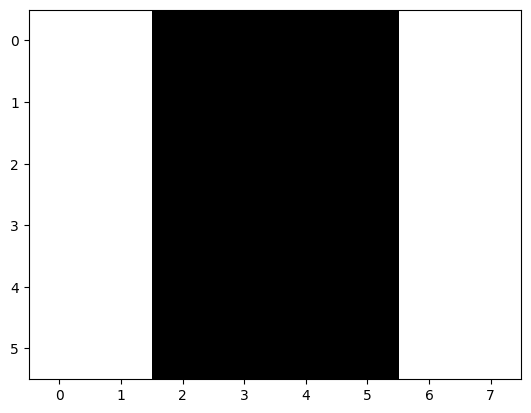

In [89]:
plt.imshow(X, cmap=plt.cm.gray)

In [90]:
K = torch.tensor([[1.0, -1.0]])

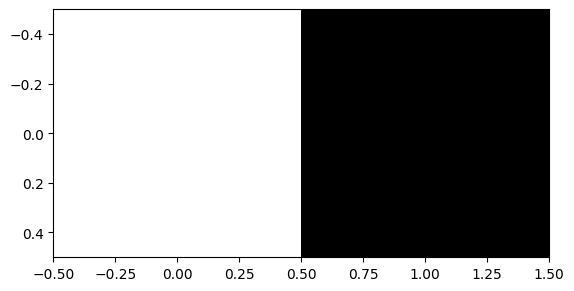

In [91]:
plt.imshow(K, cmap=plt.cm.gray)

In [92]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

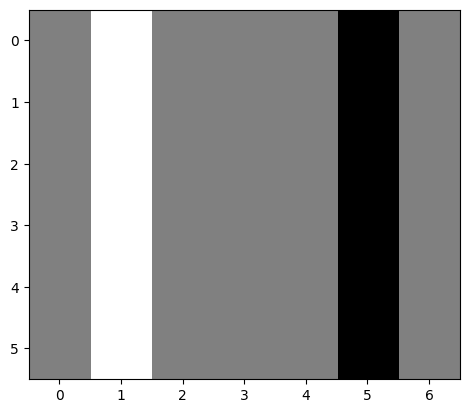

In [93]:
plt.imshow(Y, cmap=plt.cm.gray)

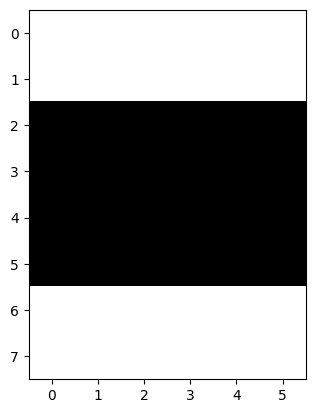

In [94]:
X_t = X.t()

plt.imshow(X_t, cmap=plt.cm.gray)

In [95]:
Y2 = corr2d(X_t, K)
Y2

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

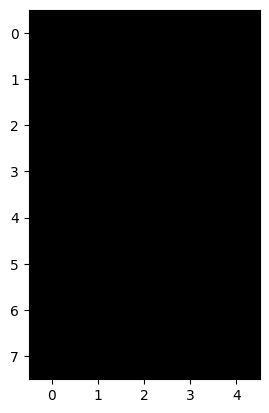

In [96]:
plt.imshow(Y2, cmap=plt.cm.gray)

In [97]:
conv2d = nn.LazyConv2d(out_channels=1, kernel_size=(1, 2), bias=False)

X = X.reshape((1, 1, X.shape[0], X.shape[1]))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2

for i in range(10):
    Y_hat = conv2d(X)
    loss = (Y_hat - Y)**2
    conv2d.zero_grad()
    loss.sum().backward()

    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {loss.sum():.3f}')

epoch 2, loss 2.383
epoch 4, loss 0.647
epoch 6, loss 0.210
epoch 8, loss 0.077
epoch 10, loss 0.030


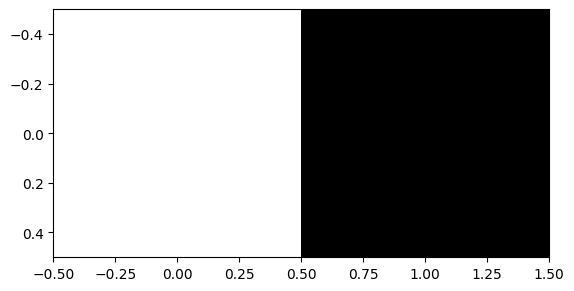

In [105]:
plt.imshow(conv2d.weight.data.reshape(1, 2), cmap=plt.cm.gray)

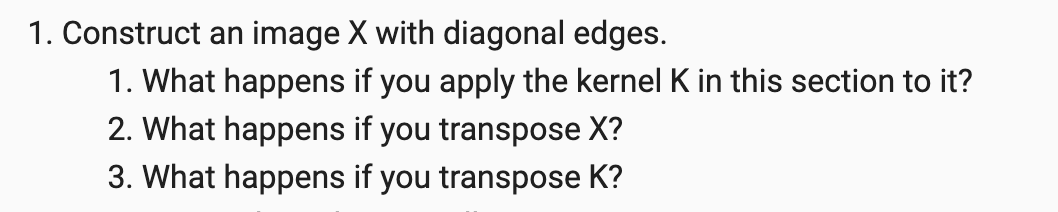

In [109]:
X = torch.ones((8, 8))
X = torch.tril(X)

X

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

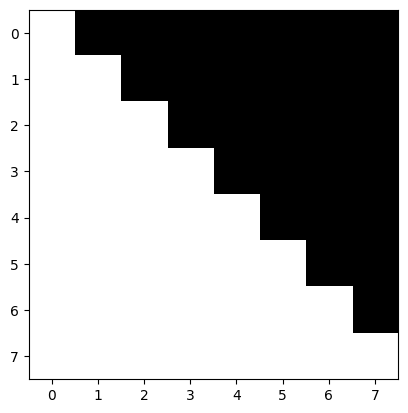

In [110]:
plt.imshow(X, cmap=plt.cm.gray)

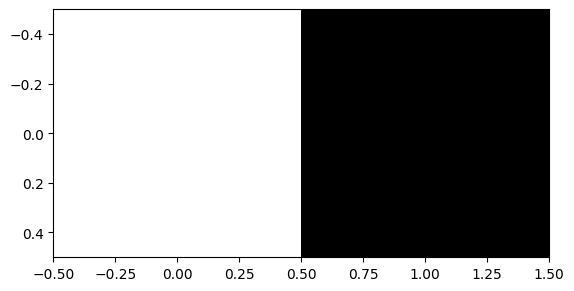

In [112]:
K = torch.tensor([1, -1]).reshape(1, 2)

plt.imshow(K, cmap=plt.cm.gray)

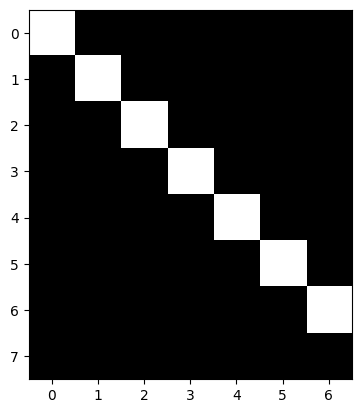

In [114]:
plt.imshow(corr2d(X, K), cmap=plt.cm.gray)

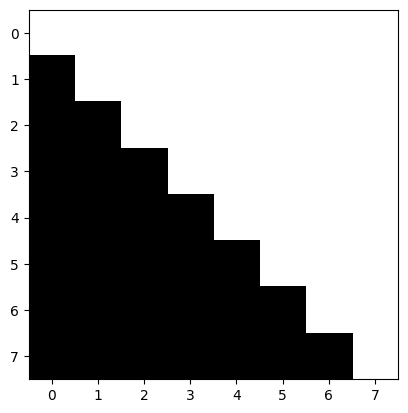

In [115]:
trans_X = X.t()

plt.imshow(trans_X, cmap=plt.cm.gray)

In [117]:
corr2d(trans_X, K)

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.]])

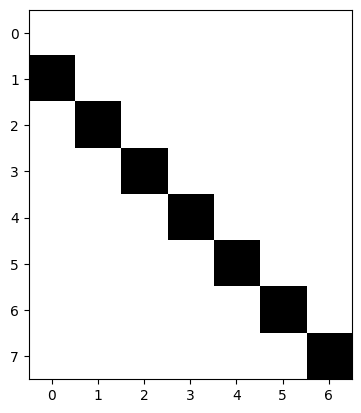

In [116]:
plt.imshow(corr2d(trans_X, K), cmap=plt.cm.gray)

In [118]:
X

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [119]:
trans_K = K.t()

trans_K

tensor([[ 1],
        [-1]])

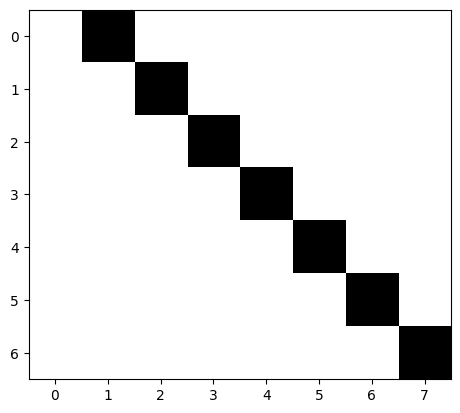

In [120]:
plt.imshow(corr2d(X, trans_K), cmap=plt.cm.gray)

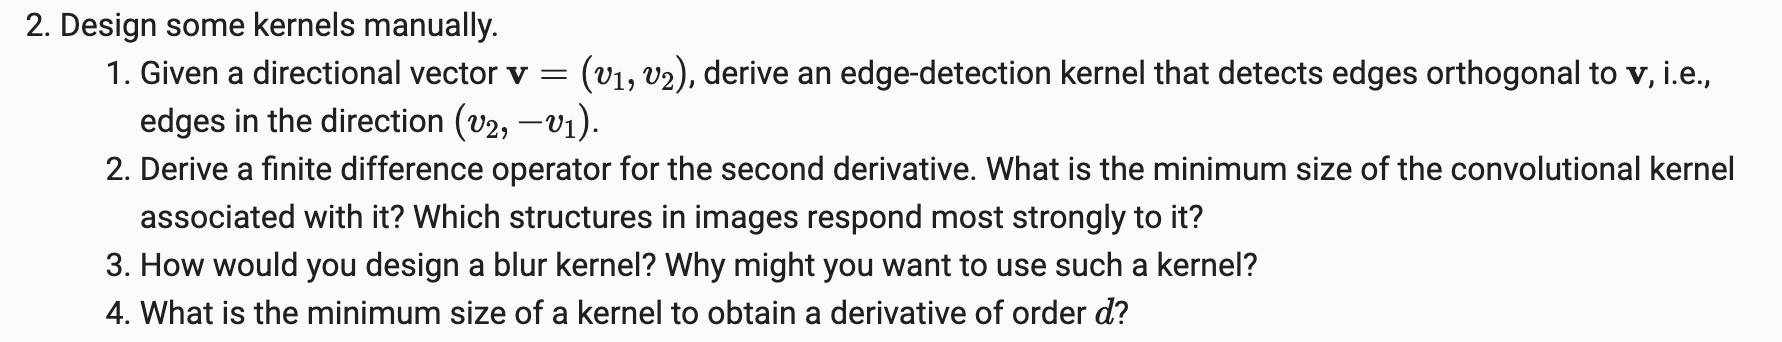

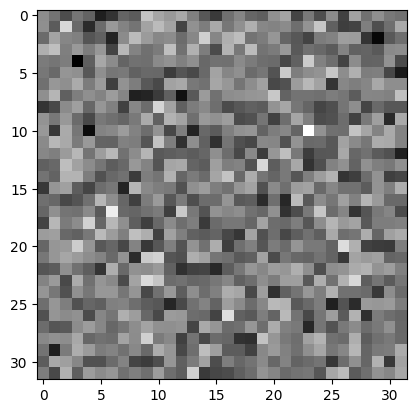

In [126]:
X = torch.randn((32, 32))
plt.imshow(X, cmap=plt.cm.gray)

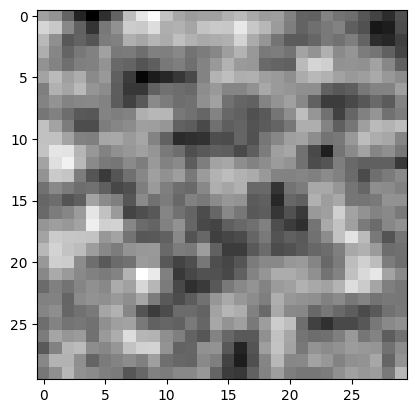

In [127]:
K = torch.ones((3, 3)) / 9

plt.imshow(corr2d(X, K), cmap=plt.cm.gray)